# Import relevant libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('C:/Users/PRATEEK/Downloads/Data Science Practice files/Models/Stock Trend App/AXISBANK.csv')
raw_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [3]:
df = raw_data.copy()

In [4]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [5]:
to_drop = ['Date', 'Symbol', 'Series', 'Prev Close', 'Last', 'VWAP' , 'Turnover', 'Trades', 'Deliverable Volume',
          '%Deliverble']

In [6]:
df = df.drop(to_drop, axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,26.7,26.70,26.70,26.70,112100
1,27.0,28.70,26.50,26.85,234500
2,26.0,27.75,25.50,26.30,170100
3,25.8,27.00,25.80,25.95,102100
4,25.0,26.00,24.25,24.80,62600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5306 non-null   float64
 1   High    5306 non-null   float64
 2   Low     5306 non-null   float64
 3   Close   5306 non-null   float64
 4   Volume  5306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 207.4 KB


In [8]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

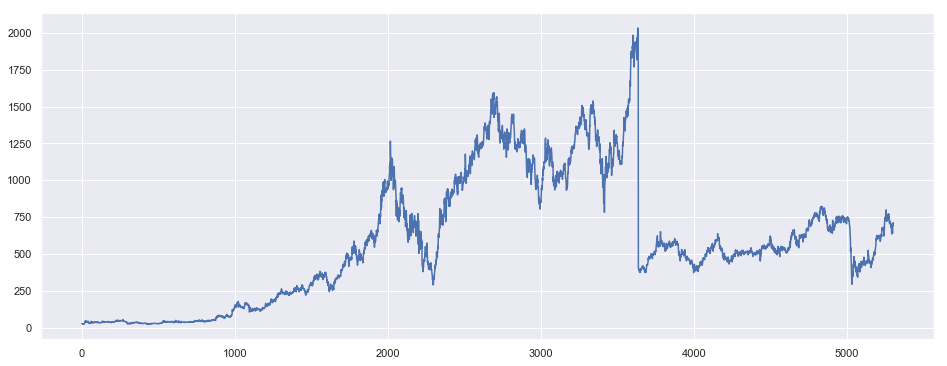

In [9]:
df['Open'].plot(figsize = (16,6))

In [10]:
df.Open

0        26.7
1        27.0
2        26.0
3        25.8
4        25.0
        ...  
5301    694.0
5302    691.1
5303    708.0
5304    712.0
5305    705.0
Name: Open, Length: 5306, dtype: float64

#### Moving average of first 100 days, Plotting against original data

In [11]:
ma = df.rolling(100).mean()
ma.head(15)

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


Plot the rolling mean and the actual 'Open' feature.

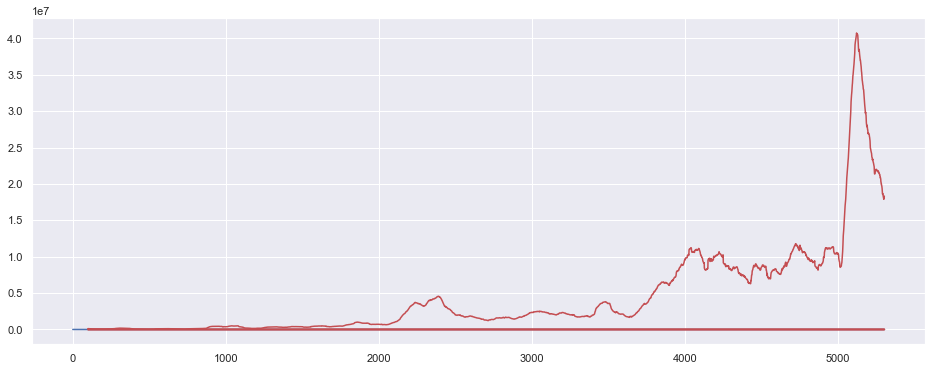

In [12]:
df['Open'].plot(figsize = (16,6))
plt.plot(ma, 'r')

Moving Average of first 200 plotted against original value

In [13]:
ma200 = df.rolling(200).mean()

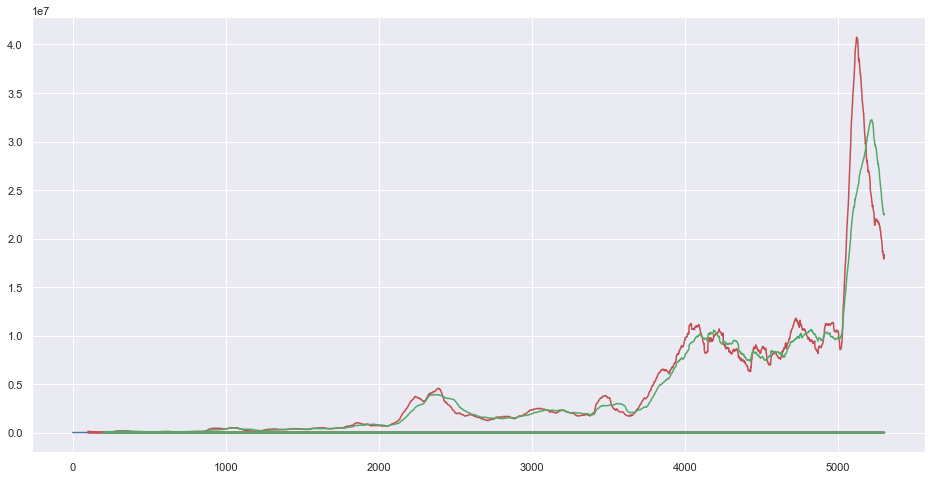

In [14]:
df['Open'].plot(figsize = (16,8))
plt.plot(ma, 'r')
plt.plot(ma200, 'g')

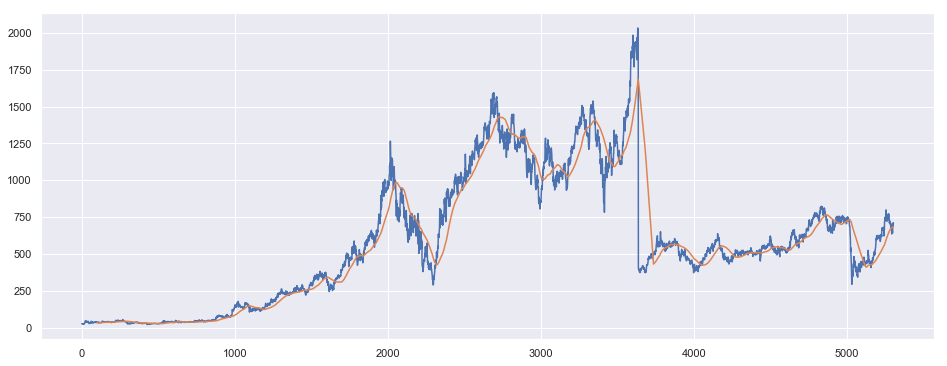

In [15]:
df['Open'].plot(figsize = (16,6))
df.rolling(window = 100).mean()['Close'].plot()

# Data Preprocessing

### Spliting data into Train and Test

In [16]:
df.shape

(5306, 5)

In [17]:
col = list(df)
col

['Open', 'High', 'Low', 'Close', 'Volume']

In [18]:
df['Volume'] = df['Volume'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5306 non-null   float64
 1   High    5306 non-null   float64
 2   Low     5306 non-null   float64
 3   Close   5306 non-null   float64
 4   Volume  5306 non-null   float64
dtypes: float64(5)
memory usage: 207.4 KB


#### CHECKPOINT 1

### assign training data

In [20]:
df_for_model = df.copy()

In [21]:
#scaling the data ffor the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_for_model)

In [22]:
scaled_df_for_training = scaler.transform(df_for_model)

In [23]:
x_train = []
y_train = []

n_future = 1  # no. of days to predict
n_past = 14   # no of days we want the prediction to be based on
              # based on above lines, we'll train the model for every 14 days and predict for the 15th day.

for i in range(n_past, len(scaled_df_for_training) - n_future + 1):
  x_train.append(scaled_df_for_training[i - n_past: i, 0: df_for_model.shape[0]])
  y_train.append(scaled_df_for_training[i + n_future - 1: i + n_future, 0])

 #### *convert the x_train and y_train in array(the're in list form)*

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [26]:
x_train.shape, y_train.shape

((5292, 14, 5), (5292, 1))

# Create Model

In [28]:
# import relevant model libraries

from tf.keras.layers import Dense, Dropout, LSTM
from tf.keras.models import Sequential


ModuleNotFoundError: No module named 'tf'

### Intialize the RNN

In [ ]:
model = Sequential()

# Layer 1
model.add(LSTM(units = 64, activation = 'relu', input_shape = (x_train.shape[1], x_train.shape[2]), return_sequences = True))

# Layer 2
model.add(LSTM(units = 64, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))

#Layer 3
model.add(Dense(y_train.shape[1]))

*Compile the model*

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

 *Fit the model*

In [29]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 2)
history = model.fit(x_train, y_train, epochs = 10, batch_size = 25, validation_split = 0.1, verbose = 2, callbacks = callback)

In [ ]:
#plot the training loss vs validation loss
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

In [ ]:
#extract dates from raw_data
train_dates = pd.to_datetime(raw_data['Date'])
train_dates.tail(15)

In [ ]:
#prediction for the future 30 days
n_past = 121
n_prediction_days = 120 #predicting the past 15 days for training

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods = n_prediction_days, freq = '1d').tolist()
predict_period_dates

In [ ]:
#PREDICT

predict = model.predict(x_train[-n_prediction_days:])

In [ ]:
predict.shape

In [ ]:
# as the imputs we have are scaled in nature, we have to inverse them in order to mke sense from them.
# when we did scaling, we scaled 5 variables, here also we neeed 5 variables. Instead we'll copy the 'predict' variable 5 times.
# when storing the values we'll only save anyone column thus preventing ambiguity.

In [ ]:
predict_copies = np.repeat(predict, df_for_model.shape[1], axis = 1)
y_pred_future = scaler.inverse_transform(predict_copies)[:,0]

In [ ]:
y_pred_future

In [ ]:
#Convert time stamps into Dates
predict_dates = []

for i in predict_period_dates:
  predict_dates.append(i.date())

df_predict = pd.DataFrame({'Date': np.array(predict_dates), 'Open': y_pred_future})
df_predict['Date'] = pd.to_datetime(df_predict['Date'])

In [ ]:
original = raw_data[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
# for visiualization we'll look at graph from a early stage
original = original.loc[original['Date'] >= '2018-5-1']

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_predict['Date'], df_predict['Open'])

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(original['Date'], original['Open'], color = 'r', label = 'Original Price')
plt.plot(df_predict['Date'], df_predict['Open'], color = 'g', label = 'Predicted Price')
plt.title('Axis Bank Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
model.save('Rnn_model')